In [1]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import pandas as pd
from PIL import Image
from bs4 import BeautifulSoup
import requests
from konlpy.tag import Twitter
from collections import Counter
import matplotlib.pyplot as plt
import random

In [2]:
import matplotlib.pyplot as plt
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 
    
%matplotlib inline

# 파일 입력

In [3]:
review = pd.read_csv('./review_all.csv', encoding='949')
review = review.drop(review.columns[0], axis='columns')

text = open('./test.txt').read()
heart = np.array(Image.open('./heart.png'))


# 그림 사이즈 check

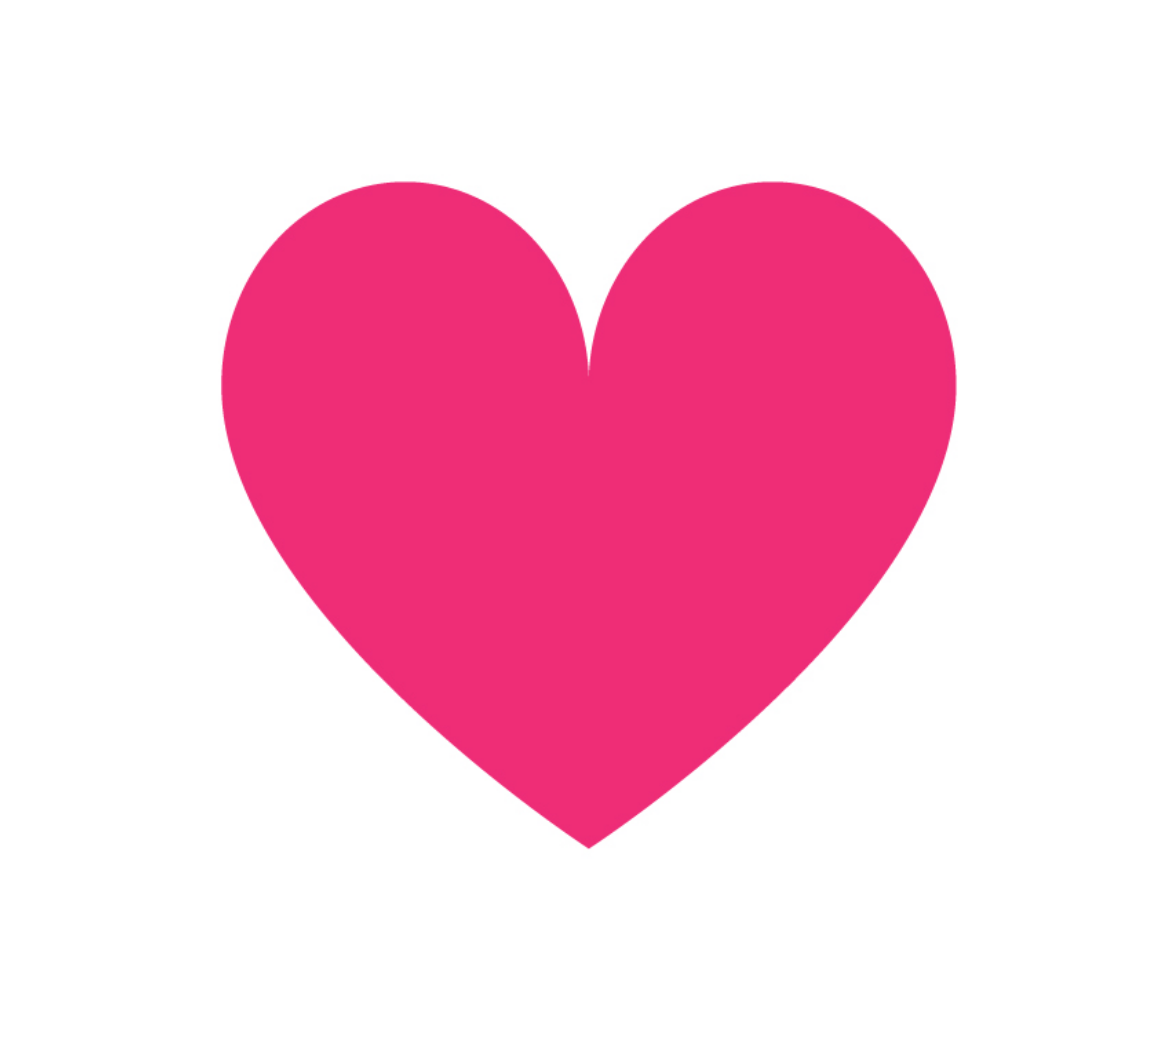

In [4]:
plt.figure(figsize=(20,20))  #사이즈 체크
plt.imshow(heart, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
def Review_cloud(Product):
    
    #dic = {}

    #for k in Review['Color'].unique():
    Review = review.loc[review['Product']==Product]
    Reviews = Review['Review']
    
    twitter = Twitter()
    word_counts=12000           #빈출단어중 1위부터 몇위까지만 보여줄지 선택
    sentences_tag = []

    #형태소 분석하여 리스트에 넣기
    stopwords_tmp= pd.read_csv('./stopwords_1~2000.csv', encoding='949')
    stopwords_test=stopwords_tmp["stopword"]
    stopwords=list(stopwords_test)
    stopwords.append("제품")

    for sentence in Reviews:
        morph = twitter.pos(sentence)
        sentences_tag.append(morph)
    #         print(morph)
    #         print('-' * 30)

    #     print(sentences_tag)
    #     print('\n' * 3)

    noun_adj_list = []
    #명사와 형용사만 구분하여 이스트에 넣기
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if tag in ['Noun', 'Adjective']:
                noun_adj_list.append(word)

    #형태소별 count
    counts = Counter(noun_adj_list)
    tags = counts.most_common(word_counts)
    # print(tags)
    # print('-' * 30)


    #wordCloud생성
    #한글꺠지는 문제 해결하기위해 font_path 지정
    #     wc = WordCloud(font_path='c:\\windows\\fonts\\NanumGothic.ttf', background_color='white', width=800, height=600)
    wc = WordCloud(font_path='c:\\windows\\fonts\\NanumGothic.ttf', stopwords = stopwords, background_color='white', max_words=1500, 
                   mask=heart, colormap="Reds")
    # print(dict(tags))
    a=dict(tags)
    a_list=list(a)

    for i in range(len(a_list)):
        if a_list[i] in stopwords:
            del a[a_list[i]]
    print(a)
    # except:
    #     print("불용어 포함 안돼있어서 넘어갑니다~")
    cloud = wc.generate_from_frequencies(a)
    # cloud = wc.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(20,20))
    plt.axis('off')
    plt.imshow(cloud, interpolation='bilinear')
    plt.show()

{'생각': 14, '발림': 13, '발색': 12, '매트': 12, '지속': 11, '진짜': 11, '정말': 8, '좋아요': 7, '예뻐요': 7, '쿨톤': 5, '다른': 5, '단독': 5, '좋은': 4, '라카': 4, '느낌': 4, '좋아서': 4, '베이스': 4, '이뻐요': 4, '별로': 3, '자연': 3, '예쁜데': 3, '건조하고': 3, '추천': 3, '케이스': 3, '부드럽게': 3, '각질': 3, '부각': 3, '용감': 3, '벨벳': 3, '그라데이션': 3, '색깔': 3, '처음': 3, '제타': 3, '브라운': 3, '만족합니다': 2, '오프라인': 2, '충성': 2, '주름': 2, '겉': 2, '안쪽': 2, '촉촉한': 2, '로이': 2, '아쉬웠어요': 2, '미아': 2, '얼굴': 2, '좋네요': 2, '비슷한': 2, '아쉽': 2, '쨍': 2, '가을': 2, '컨셉': 2, '약해요': 2, '아주': 2, '페브': 2, '예쁘지만': 2, '좋고': 2, '사고': 2, '촉촉하게': 2, '섀도': 2, '상태': 2, '예뻐서': 2, '웜': 2, '레드': 2, '텍스처': 2, '짧은거': 1, '저렴하게': 1, '손님': 1, '대상': 1, '선착순': 1, '사이즈': 1, '기대': 1, '건조해서': 1, '아니었지만': 1, '난이': 1, '없으면': 1, '무펄': 1, '이상한': 1, '그닥': 1, '촉촉해서': 1, '약하게나와': 1, '건성': 1, '막': 1, '어렵더라구요': 1, '다시': 1, '도전': 1, '화면': 1, '보덧것': 1, '실제': 1, '색시': 1, '예쁩니다': 1, '강': 1, '추색': 1, '예쁘게': 1, '아티스트': 1, '어둡지만': 1, '무난': 1, '이쁜것': 1, '진한': 1, '딱좋아요': 1, '차분해서': 1, '웜톤': 1, '깔끔하긴': 1, '아쉽네요': 1, 

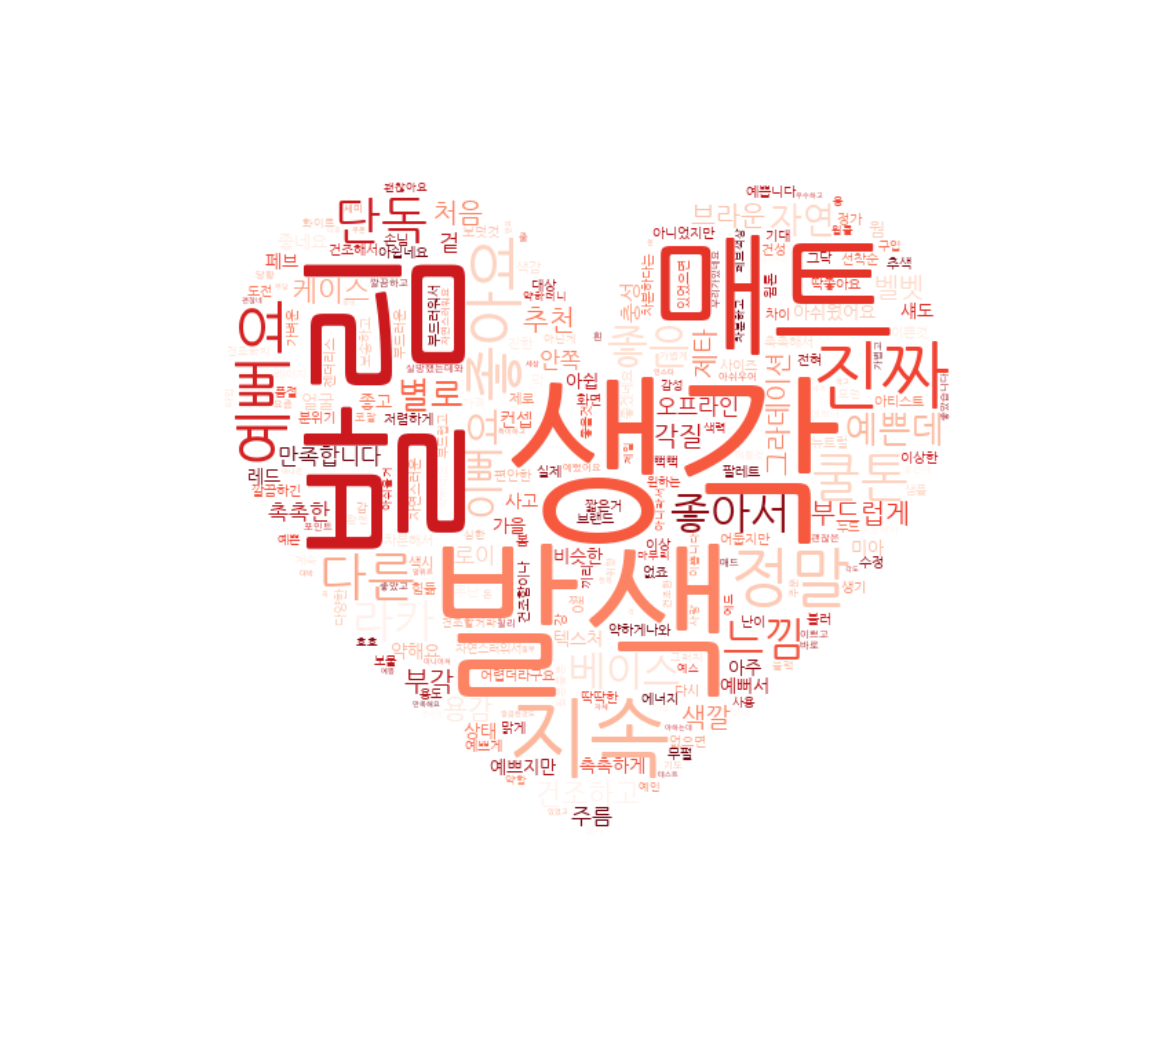

In [12]:
Review_cloud('스무스 매트 립스틱')